In [63]:
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 16, 12


from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve

In [64]:
file = 'train.csv'
data = pd.read_csv(file)

In [65]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [66]:
y = data['Survived']

In [67]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [68]:
x = data

In [69]:
#del x['Survived']
#del x['Name']
#del x['Ticket']
#del x['Cabin']
#del x['PassengerId']

x.drop('Survived', axis=1, inplace=True)
x.drop('Name', axis=1, inplace=True)
x.drop('Ticket', axis=1, inplace=True)
x.drop('Cabin', axis=1, inplace=True)
x.drop('PassengerId', axis=1, inplace=True)

In [70]:
# Age for children less than 1 year has been rounded up to 1 year
x['Age'] = x['Age'].fillna(1)
x['Age'] = x['Age'].astype(int)
x.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
2,3,female,26,0,0,7.9250,S


In [71]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,23.982043,0.523008,0.381594,32.204208
std,0.836071,17.331069,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,7.910400
50%,3.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
# Feature Engineering
# Create a new feature
# "Women and Children only"
adult_cutoff = 18
x['Person'] = pd.Series(index=x.index)

def person(row):
    if row['Age'] < adult_cutoff:
        return 'child'
    elif row['Age'] >= adult_cutoff:
        return row['Sex'] 
    else:
        return 'other'

x['Person'] = x.apply(person, axis=1)
x.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
0,3,male,22,1,0,7.2500,S,male
1,1,female,38,1,0,71.2833,C,female
2,3,female,26,0,0,7.9250,S,female
3,1,female,35,1,0,53.1000,S,female
4,3,male,35,0,0,8.0500,S,male
5,3,male,1,0,0,8.4583,Q,child
6,1,male,54,0,0,51.8625,S,male
7,3,male,2,3,1,21.0750,S,child
8,3,female,27,0,2,11.1333,S,female
9,2,female,14,1,0,30.0708,C,child


In [73]:
labelsex = LabelEncoder()
labelperson = LabelEncoder()
labelemb = LabelEncoder()
x['Sex'] = labelsex.fit_transform(x['Sex'])
x['Person'] = labelperson.fit_transform(x['Person'])

#data['Embarked'].dtype
x['Embarked'] = x['Embarked'].astype(str)
x['Embarked'] = labelemb.fit_transform(x['Embarked'])
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
0,3,1,22,1,0,7.2500,2,2
1,1,0,38,1,0,71.2833,0,1
2,3,0,26,0,0,7.9250,2,1
3,1,0,35,1,0,53.1000,2,1
4,3,1,35,0,0,8.0500,2,2
5,3,1,1,0,0,8.4583,1,0
6,1,1,54,0,0,51.8625,2,2
7,3,1,2,3,1,21.0750,2,0
8,3,0,27,0,2,11.1333,2,1
9,2,0,14,1,0,30.0708,0,0


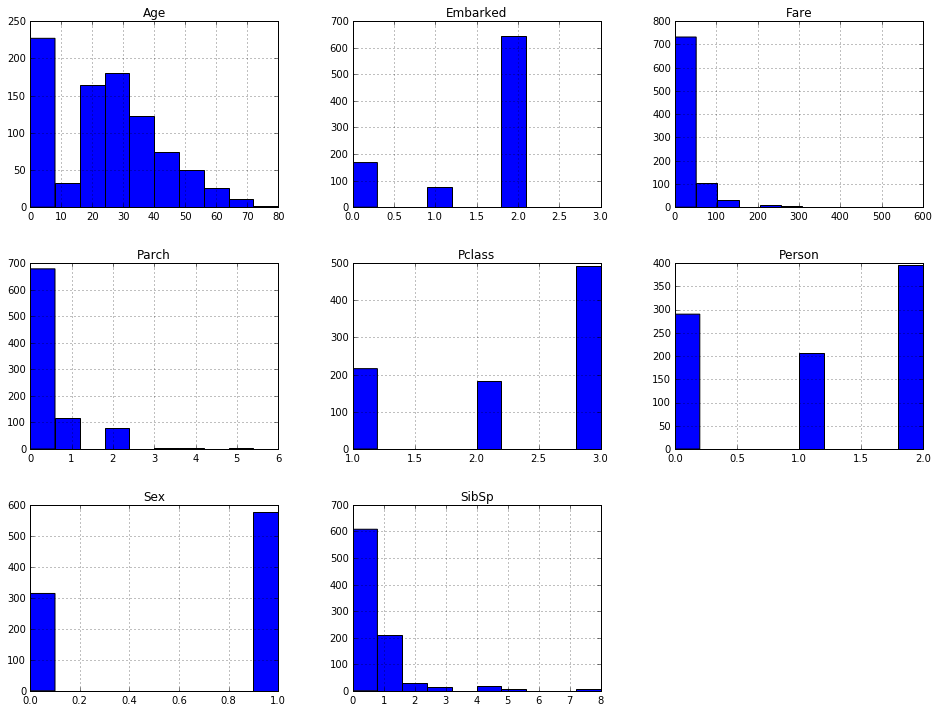

In [74]:
x.hist()
plt.show()

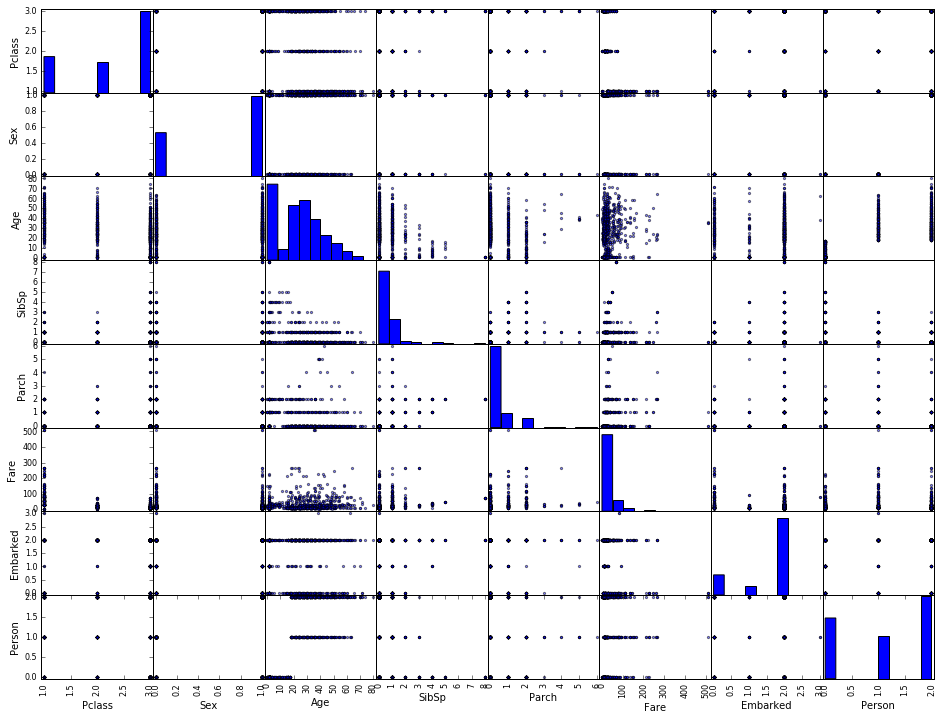

In [75]:
scatter_matrix(x)
plt.show()

In [76]:
# Prepare Data

# Split-out validation dataset
#array = dataset.values
#X = array[:,0:8]
#Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(x, y, test_size=validation_size, 
                                                                                 random_state=seed)

In [77]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [78]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
results = []
names = []
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
for name, model in models:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.804871 (0.043697)
LDA: 0.799257 (0.040612)
KNN: 0.677269 (0.080373)
CART: 0.762735 (0.052148)
NB: 0.804773 (0.048050)
SVM: 0.695481 (0.077716)
XGB: 0.831592 (0.047286)


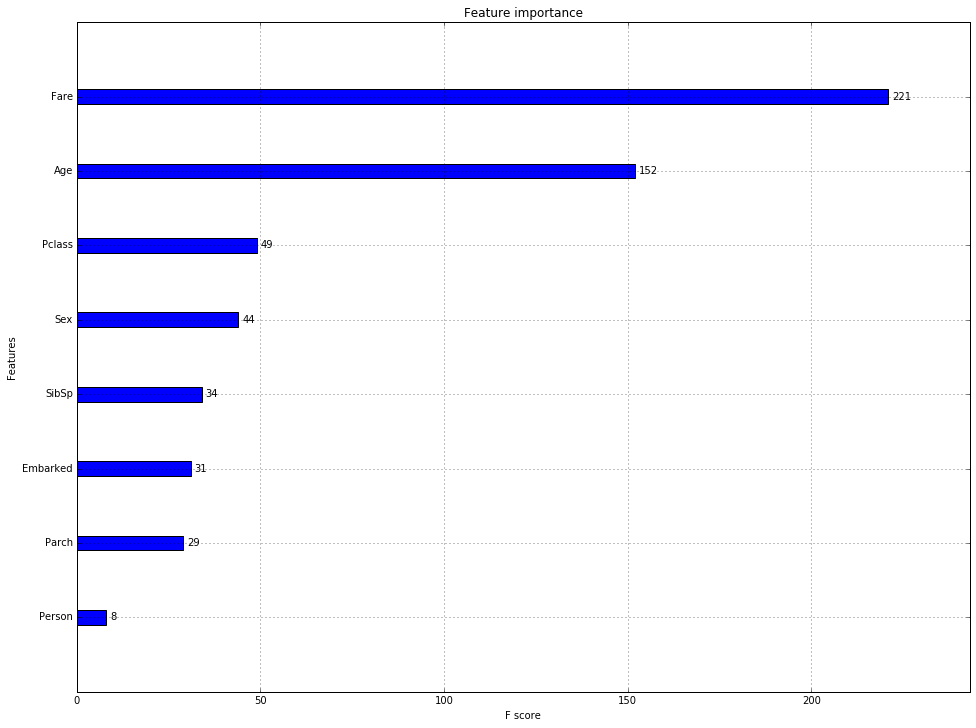

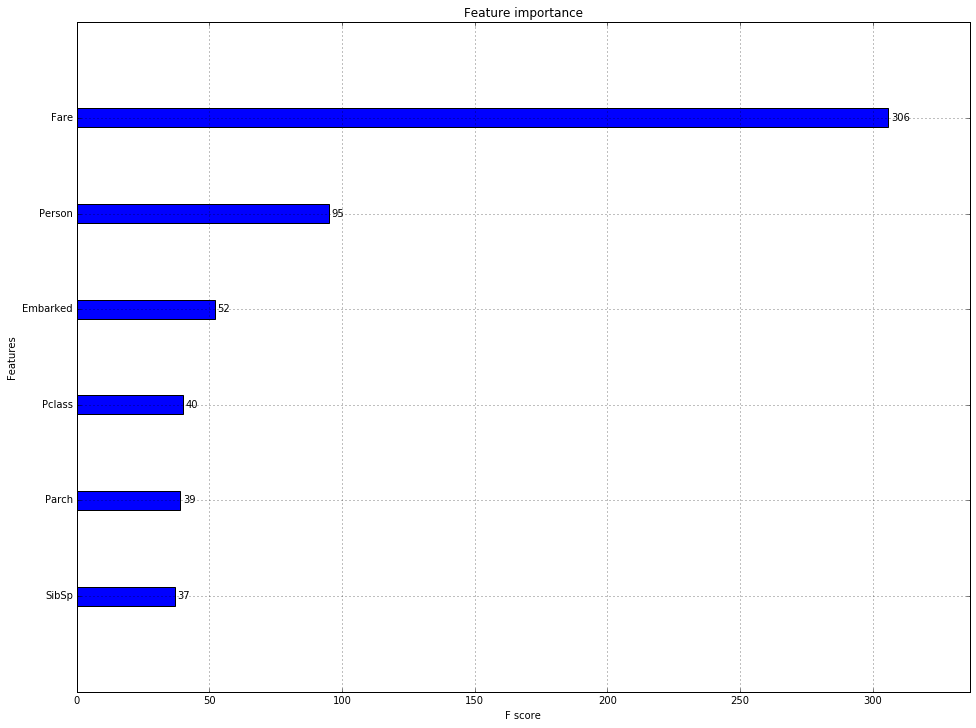

In [79]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_validation)
plot_importance(xgb)

# Remove Age and Sex from the training data
# Once we do, person jumps up to 2nd place in importance
xgb_per = XGBClassifier()
X_train_per = X_train.drop(['Age','Sex'], axis=1)
X_validation_per = X_validation.drop(['Age','Sex'], axis=1)
xgb_per.fit(X_train_per, Y_train)
Y_pred = xgb_per.predict(X_validation_per)
plot_importance(xgb_per)

plt.show()

In [80]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
Y_pred = cart.predict(X_validation)
for col, imp in zip(x.columns, cart.feature_importances_):
    print("Column:%s -> Imp:%f" %(col, imp))

Column:Pclass -> Imp:0.091587
Column:Sex -> Imp:0.347483
Column:Age -> Imp:0.192892
Column:SibSp -> Imp:0.032727
Column:Parch -> Imp:0.053651
Column:Fare -> Imp:0.263783
Column:Embarked -> Imp:0.011885
Column:Person -> Imp:0.005992


In [81]:
# After removing Age and Sex
cart_per = DecisionTreeClassifier()
cart_per.fit(X_train_per, Y_train)
Y_pred = cart_per.predict(X_validation_per)
for col, imp in zip(X_train_per.columns, cart_per.feature_importances_):
    print("Column:%s -> Imp:%f" %(col, imp))

Column:Pclass -> Imp:0.208077
Column:SibSp -> Imp:0.057793
Column:Parch -> Imp:0.073855
Column:Fare -> Imp:0.387528
Column:Embarked -> Imp:0.035618
Column:Person -> Imp:0.237129


In [82]:
rand = RandomForestClassifier()
rand.fit(X_train, Y_train)
Y_pred = rand.predict(X_validation)
for col, imp in zip(x.columns, rand.feature_importances_):
    print("Column:%s -> Imp:%f" %(col, imp))

Column:Pclass -> Imp:0.075991
Column:Sex -> Imp:0.239520
Column:Age -> Imp:0.197995
Column:SibSp -> Imp:0.060299
Column:Parch -> Imp:0.037315
Column:Fare -> Imp:0.264984
Column:Embarked -> Imp:0.039909
Column:Person -> Imp:0.083988


In [83]:
# After removing Age and Sex
rand_per = RandomForestClassifier()
rand_per.fit(X_train_per, Y_train)
Y_pred = rand_per.predict(X_validation_per)
for col, imp in zip(X_train_per.columns, rand_per.feature_importances_):
    print("Column:%s -> Imp:%f" %(col, imp))

Column:Pclass -> Imp:0.109761
Column:SibSp -> Imp:0.072933
Column:Parch -> Imp:0.046216
Column:Fare -> Imp:0.439733
Column:Embarked -> Imp:0.057756
Column:Person -> Imp:0.273601


In [84]:
extra = ExtraTreesClassifier()
extra.fit(X_train, Y_train)
Y_pred = extra.predict(X_validation)
for col, imp in zip(x.columns, extra.feature_importances_):
    print("Column:%s -> Imp:%f" %(col, imp))

Column:Pclass -> Imp:0.091334
Column:Sex -> Imp:0.259426
Column:Age -> Imp:0.180191
Column:SibSp -> Imp:0.062657
Column:Parch -> Imp:0.051610
Column:Fare -> Imp:0.233493
Column:Embarked -> Imp:0.039896
Column:Person -> Imp:0.081392


In [85]:
# After removing Age and Sex
extra_per = ExtraTreesClassifier()
extra_per.fit(X_train_per, Y_train)
Y_pred = extra_per.predict(X_validation_per)
for col, imp in zip(X_train_per.columns, extra_per.feature_importances_):
    print("Column:%s -> Imp:%f" %(col, imp))

Column:Pclass -> Imp:0.113102
Column:SibSp -> Imp:0.076407
Column:Parch -> Imp:0.078889
Column:Fare -> Imp:0.366828
Column:Embarked -> Imp:0.052422
Column:Person -> Imp:0.312352


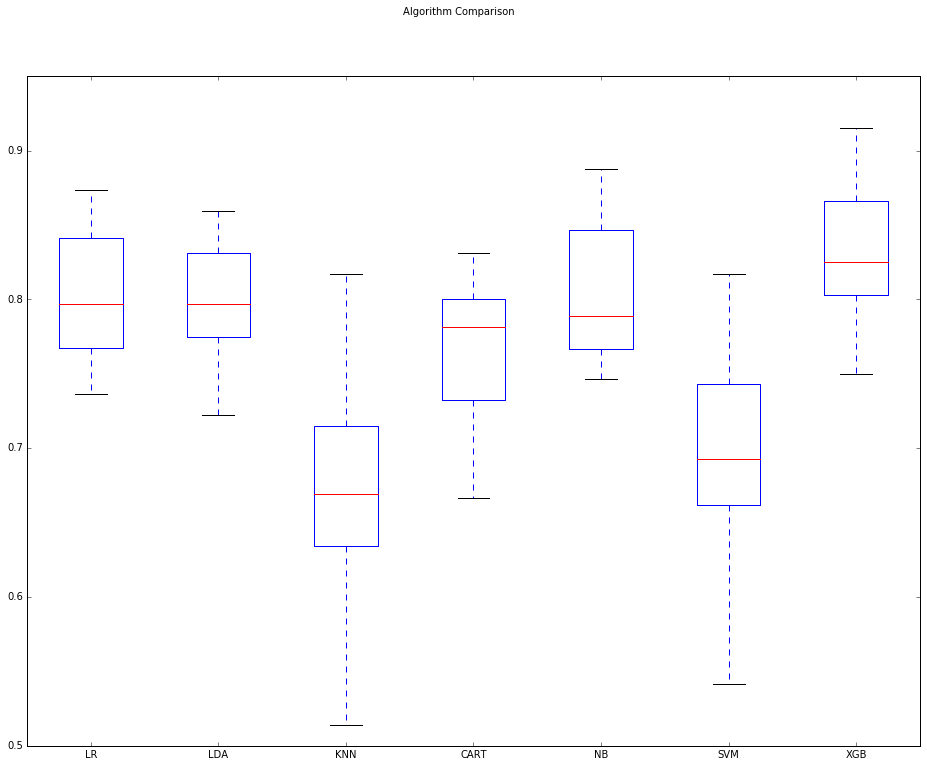

In [86]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [87]:

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier())])))
results = []
names = []
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
for name, model in pipelines:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.797829 (0.040873)
ScaledLDA: 0.799257 (0.040612)
ScaledKNN: 0.823239 (0.063083)
ScaledCART: 0.761326 (0.052460)
ScaledNB: 0.804773 (0.048050)
ScaledSVM: 0.844171 (0.046436)
ScaledXGB: 0.831592 (0.047286)


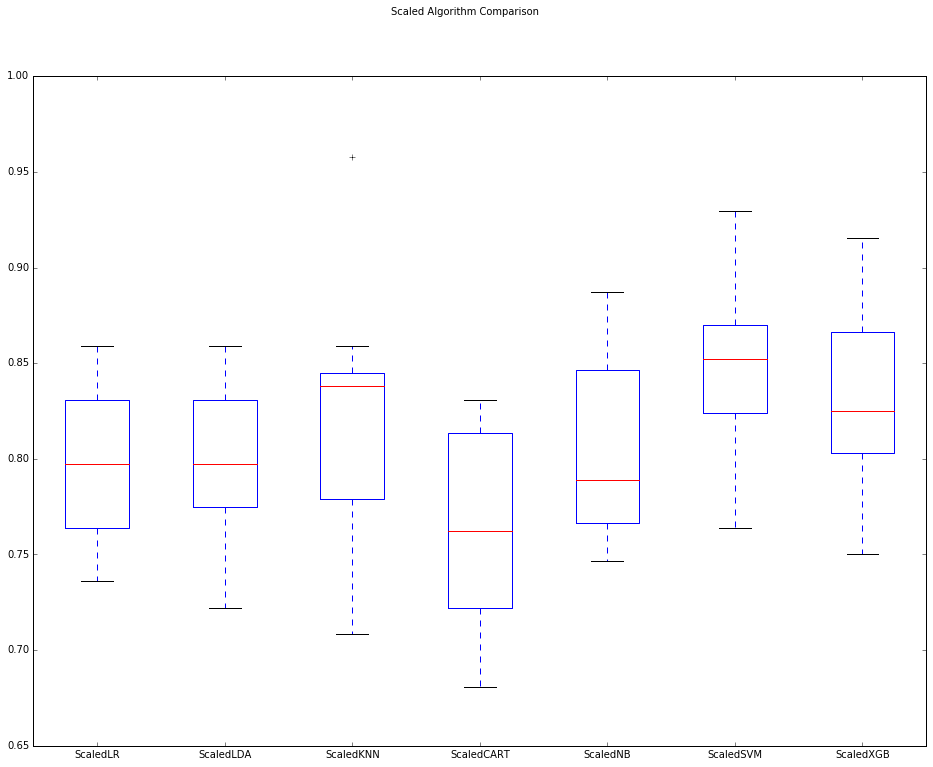

In [88]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [89]:

# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('XGB', XGBClassifier())])))
results = []
names = []
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
for name, model in pipelines:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.799276 (0.041481)
ScaledLDA: 0.799257 (0.040612)
ScaledKNN: 0.821753 (0.062730)
ScaledCART: 0.759957 (0.051650)
ScaledNB: 0.804773 (0.048050)
ScaledSVM: 0.802054 (0.043283)
ScaledXGB: 0.828736 (0.044791)


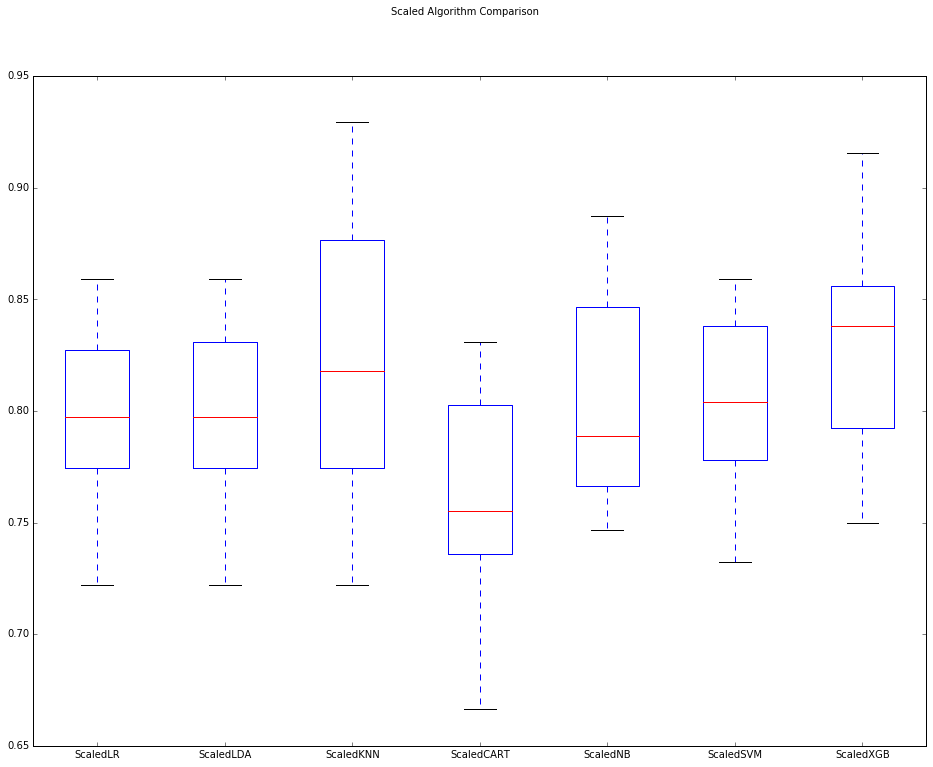

In [90]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [91]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
ensembles.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier())])))
results = []
names = []
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
for name, model in ensembles:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.809057 (0.055837)
ScaledGBM: 0.830164 (0.045433)
ScaledRF: 0.813361 (0.058656)
ScaledET: 0.807746 (0.067402)
ScaledXGB: 0.831592 (0.047286)


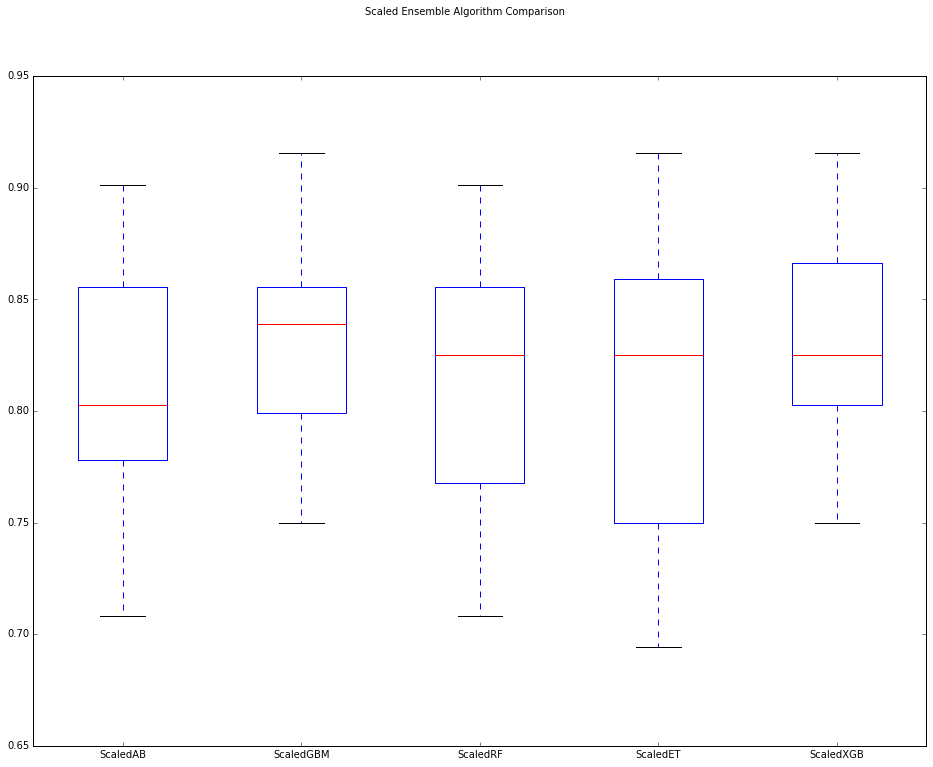

In [92]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

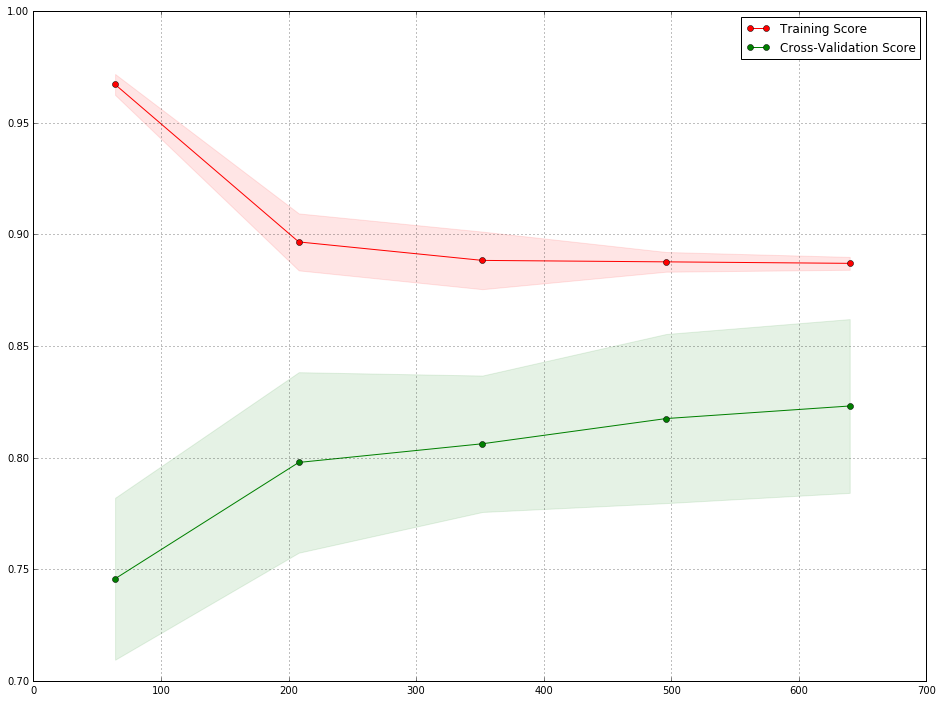

In [93]:
plt.figure()
train_sizes, train_scores, test_scores = learning_curve(xgb, x, y, cv=kfold, n_jobs=1, train_sizes=np.linspace(.1,1.0,5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()


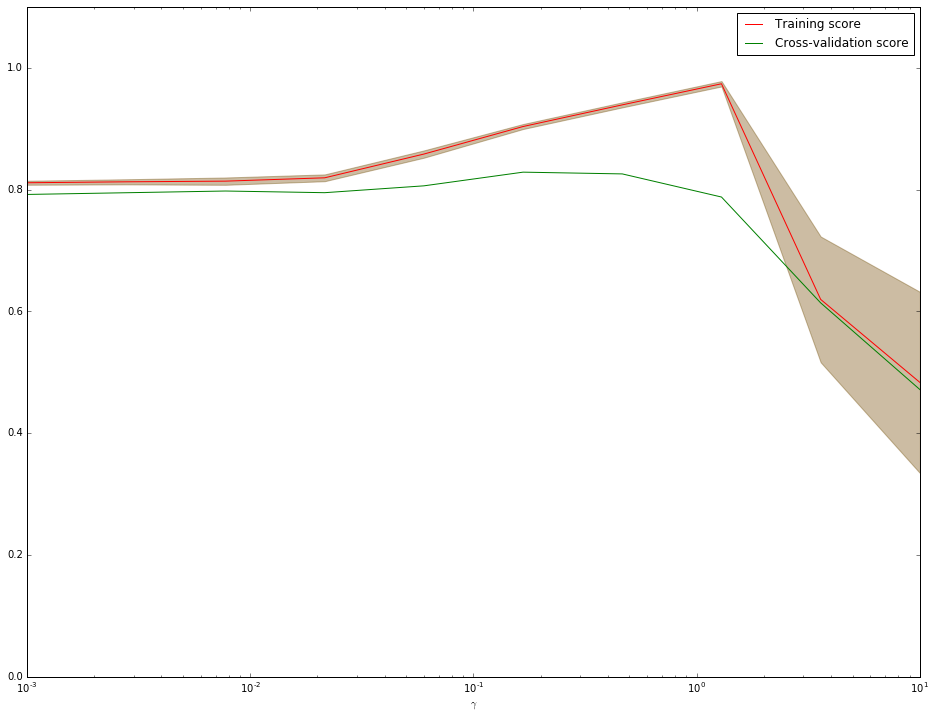

In [94]:
param_range = np.logspace(-3,1,10)
train_scores, test_scores = validation_curve(xgb, x, y, param_name="learning_rate", 
                                             param_range=param_range,
                                            cv=kfold, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.xlabel("$\gamma$")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean+train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean+train_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()